## 2강. [Deep Learning 101] 나만의 CNN을 만들어보자

https://www.youtube.com/watch?v=zjuc3ogUYmM&list=PLfGJDDf2OqlQkHqKB7uonQGeNRfUo_TMe&index=24




### pytorch 설치

docs/pytorch-install.md 문서 참고

핵심 내용
- ml_torch 라는 새로운 가상 환경을 생성하여 사용함.

In [1]:
import torch
torch.__version__

'2.6.0'

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# 현재 폴더 아래에 data/ 폴더를 생성하고 그 아래에 다운로드 받음.
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100.0%
100.0%
100.0%
100.0%


In [4]:
print(train_data)
print(type(train_data))

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
<class 'torchvision.datasets.mnist.MNIST'>


In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


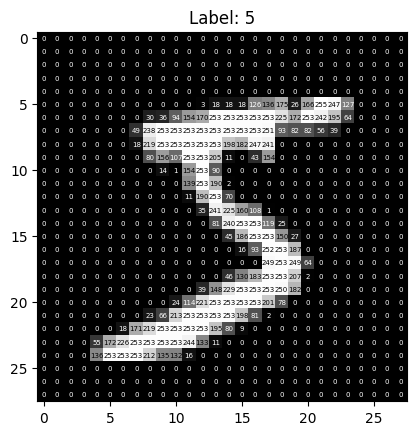

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(train_data.data[0], cmap='gray')

# 이미지 위에 픽셀값을 텍스트로 표시
for i in range(train_data.data[0].shape[0]):
    for j in range(train_data.data[0].shape[1]):
        # 흰색 배경에서는 검은색 글씨
        c = 1 if train_data.data[0][i, j].item() < 128 else 0
        # 폰트 크기가 너무 작으면 좀 키워야 함.
        ax.text(j, i, str(train_data.data[0][i, j].item()),
                color=(c, c, c), ha='center', va='center', fontsize=5)
ax.set_title(f'Label: {train_data.targets[0]}')
plt.show()

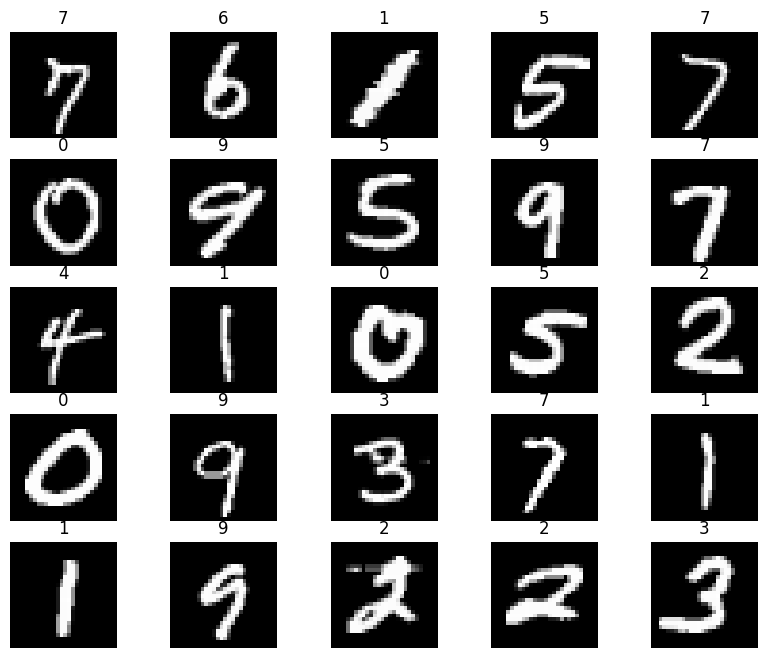

In [17]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [18]:
from torch.utils.data import DataLoader
loaders = {
    'train': torch.utils.data.DataLoader(train_data,
                                        batch_size = 100,
                                        shuffle = True,
                                        num_workers = 1),
    'test' : torch.utils.data.DataLoader(test_data,
                                        batch_size = 100,
                                        shuffle = True,
                                        num_workers = 1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x311295490>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x31135dd00>}

In [ ]:
# CNN Model (2 conv layers) 클래스 선언
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            # 1차원 (채널) 데이터를 받아서 16개 채널의 feature로 나누겠다는 말.
            # 이미지 하나는 28x28 픽셀로 구성되었으나, RGB가 아닌 gray 1채널이다.
            # kernel의 크기는 5x5
            # stride가 1, 즉 촘촘하게.
            # padding=2 라는 말은 이미지 테두리에 추가로 2픽셀씩 확장한다는 말.
            #   그러면 이미지 크기가 4씩 늘어니게 된다.
            #   feature 맵 크기를 이미지 크기와 같게 만들 수 있음.
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2), #28x28 -> 32x32 -> 28x28
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)) # 28x28 -> 14x14

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2), # 14x14 -> 18x18 -> 14x14
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)) # 14x14 -> 7x7

        # fully connected layer
        self.fc = torch.nn.Linear(32 * 7 * 7, 10, bias=True)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


----


### ai 질문 프롬프트 템플릿

pytorch 강의 자료를 따라서 연습 중인데요, 아래의 코드를 cell에 작성하여 실행했는데, .... 와 같은 문제가 있습니다.

<문제에 대한 설명>

무엇이 문제일까요?

<code>
...
</code>

제 환경은 다음과 같습니다.
- mac os, miniforge 설치. "ml_torch" 라는 이름의 가상환경 생성.
- 가상환경에 pytorch 및 ipykernel 패키지 설치
- vscode 에는 jupyter 확장 설치. ipynb 파일 작성 후 커널을 "ml_torch" 선택.